# Multi model analysis

### Load modules

In [4]:
import sys
from IPython import get_ipython
from IPython.lib.deepreload import reload

%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
from ocean3d import load_obs_data
from ocean3d import check_variable_name
from ocean3d import stratification
from ocean3d.ocean_circulation.multi_model.mld_spatial import mld_multi_model
from ocean3d.ocean_drifts.multi_model.trends import surface_trend

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data

In [5]:
# Observation
en4_reader = Reader(model='EN4', exp='en4', source="monthly")
en4_1 = en4_reader.retrieve(startdate="1990", enddate="1993")
en4_1 = check_variable_name(en4_1)
en4_2 = en4_reader.retrieve(startdate="2010", enddate="2013")
en4_2 = check_variable_name(en4_2)

# IFS-NEMO Historical
ifs_nemo_historical_reader = Reader(model='IFS-NEMO', exp='historical-1990', source="lra-r100-monthly")
ifs_nemo_historical = ifs_nemo_historical_reader.retrieve(startdate="1990", enddate="1993")
ifs_nemo_historical = check_variable_name(ifs_nemo_historical)

# IFS-NEMO Projection
ifs_nemo_ssp370_reader = Reader(model='IFS-NEMO', exp='ssp370', source="lra-r100-monthly")
ifs_nemo_ssp370 = ifs_nemo_ssp370_reader.retrieve(startdate="2020", enddate="2023")
ifs_nemo_ssp370 = check_variable_name(ifs_nemo_ssp370)

# # ICON Historical
# icon_historical_reader = Reader(model='ICON', exp='historical-1990', source="lra-r100-monthly")
# icon_historical = icon_historical_reader.retrieve(startdate="1990", enddate="1993")
# icon_historical = check_variable_name(icon_historical)

#ICON Projection
icon_ssp370_reader = Reader(model='ICON', exp='ssp370', source="lra-r100-monthly")
icon_ssp370 = icon_ssp370_reader.retrieve(startdate="2000", enddate="2023")
icon_ssp370 = check_variable_name(icon_ssp370)


2024-04-12 04:44:31 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-04-12 04:44:33 :: Reader :: ERROR    -> Variable time_bnds has no units!
2024-04-12 04:44:33 :: Reader :: ERROR    -> Variable lon_bnds has no units!
2024-04-12 04:44:33 :: Reader :: ERROR    -> Variable lat_bnds has no units!
2024-04-12 04:44:33 :: Reader :: ERROR    -> Variable lev_bnds has no units!
2024-04-12 04:44:33 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC
2024-04-12 04:44:33 :: Reader :: ERROR    -> Variable time_bnds has no units!
2024-04-12 04:44:33 :: Reader :: ERROR    -> Variable lon_bnds has no units!
2024-04-12 04:44:33 :: Reader :: ERROR    -> Variable lat_bnds has no units!
2024-04-12 04:44:33 :: Reader :: ERROR    -> Variable lev_bnds has no units!
2024-04-12 04:44:33 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC
2024-0

### Mixed layer depth (MLD) 

Request will consist of data dictionary and other details like region of interest, output

In [4]:
data_dict = {'EN4 1':en4_1,
             'EN4 2':en4_2,
             'IFS-NEMO Historical':ifs_nemo_historical,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon ssp370':icon_historical,
             'icon Historical':icon_ssp370
             } 
o3d_request= {
'data_dict': data_dict,
'region':'Labrador Sea',
'latS':None,
'latN':None,
'lonW':None,
'lonE':None,
'output':True,
"time" : "February",
'output_dir':'./output'}

NameError: name 'en4_1' is not defined

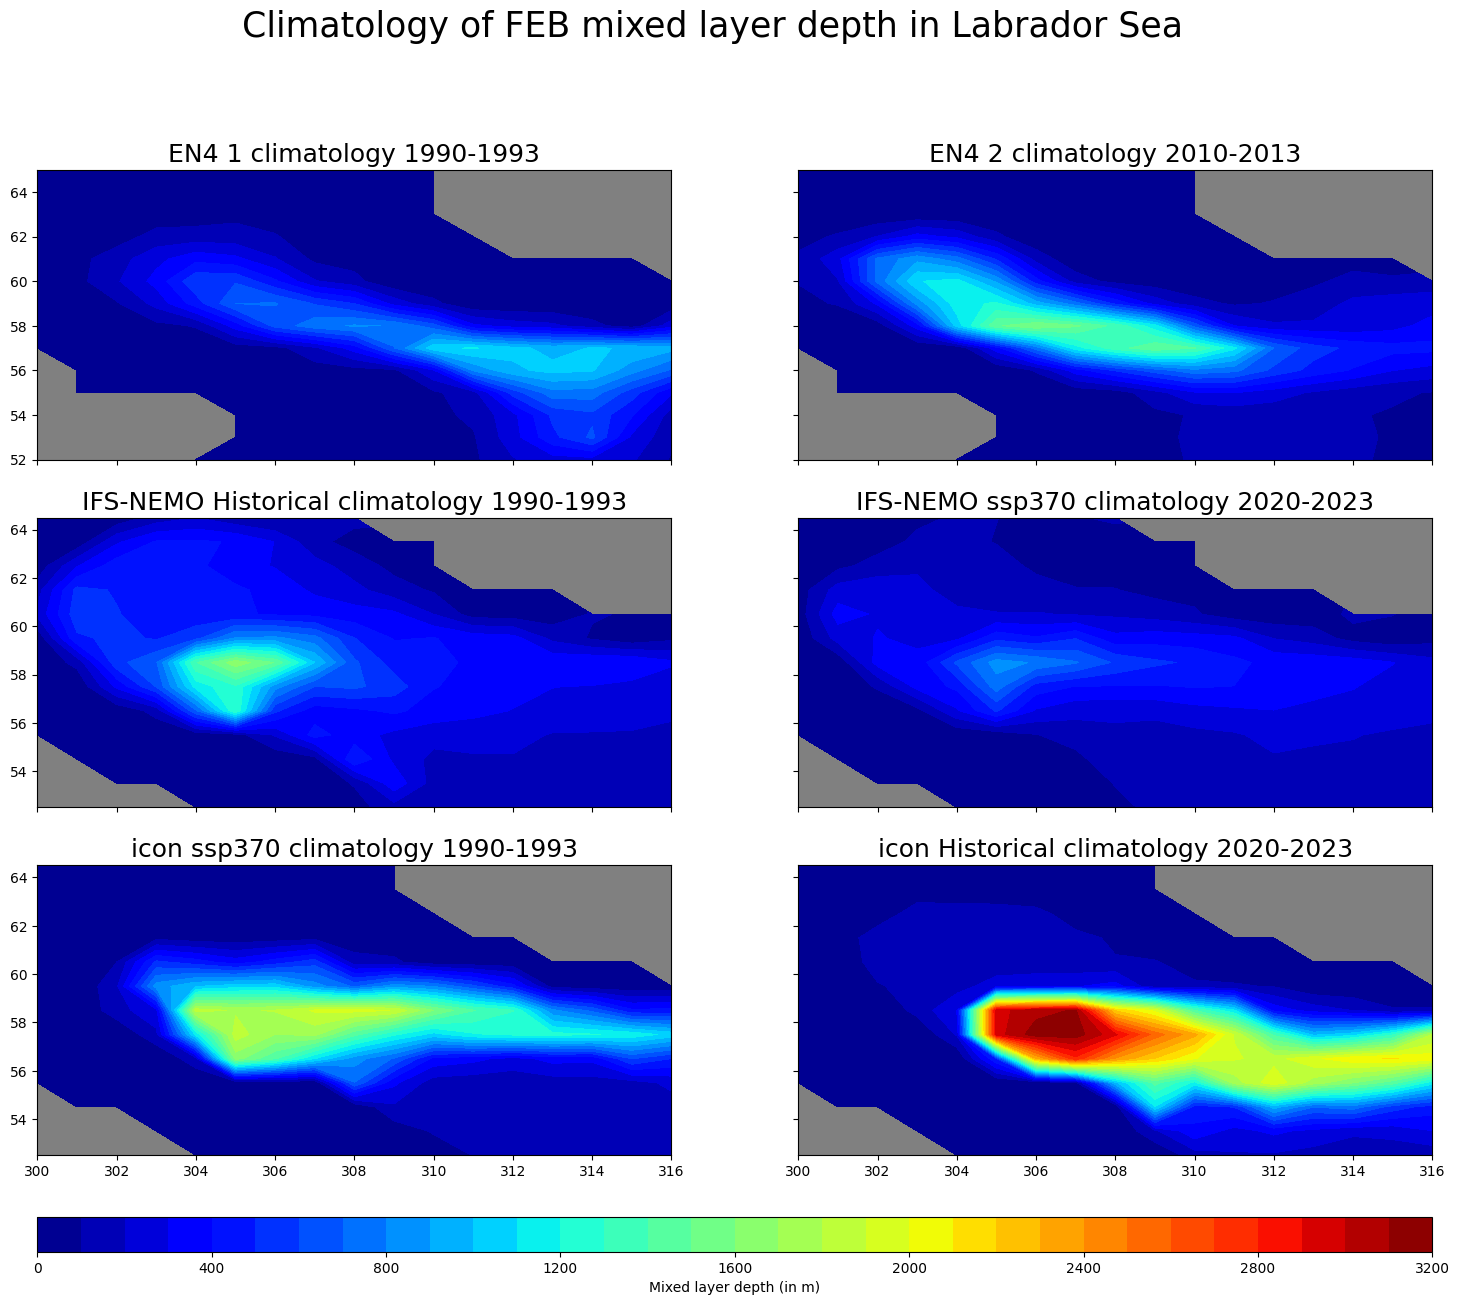

In [12]:
mld_multi_model(o3d_request)

### Trend Function

##### Trend at 1000m

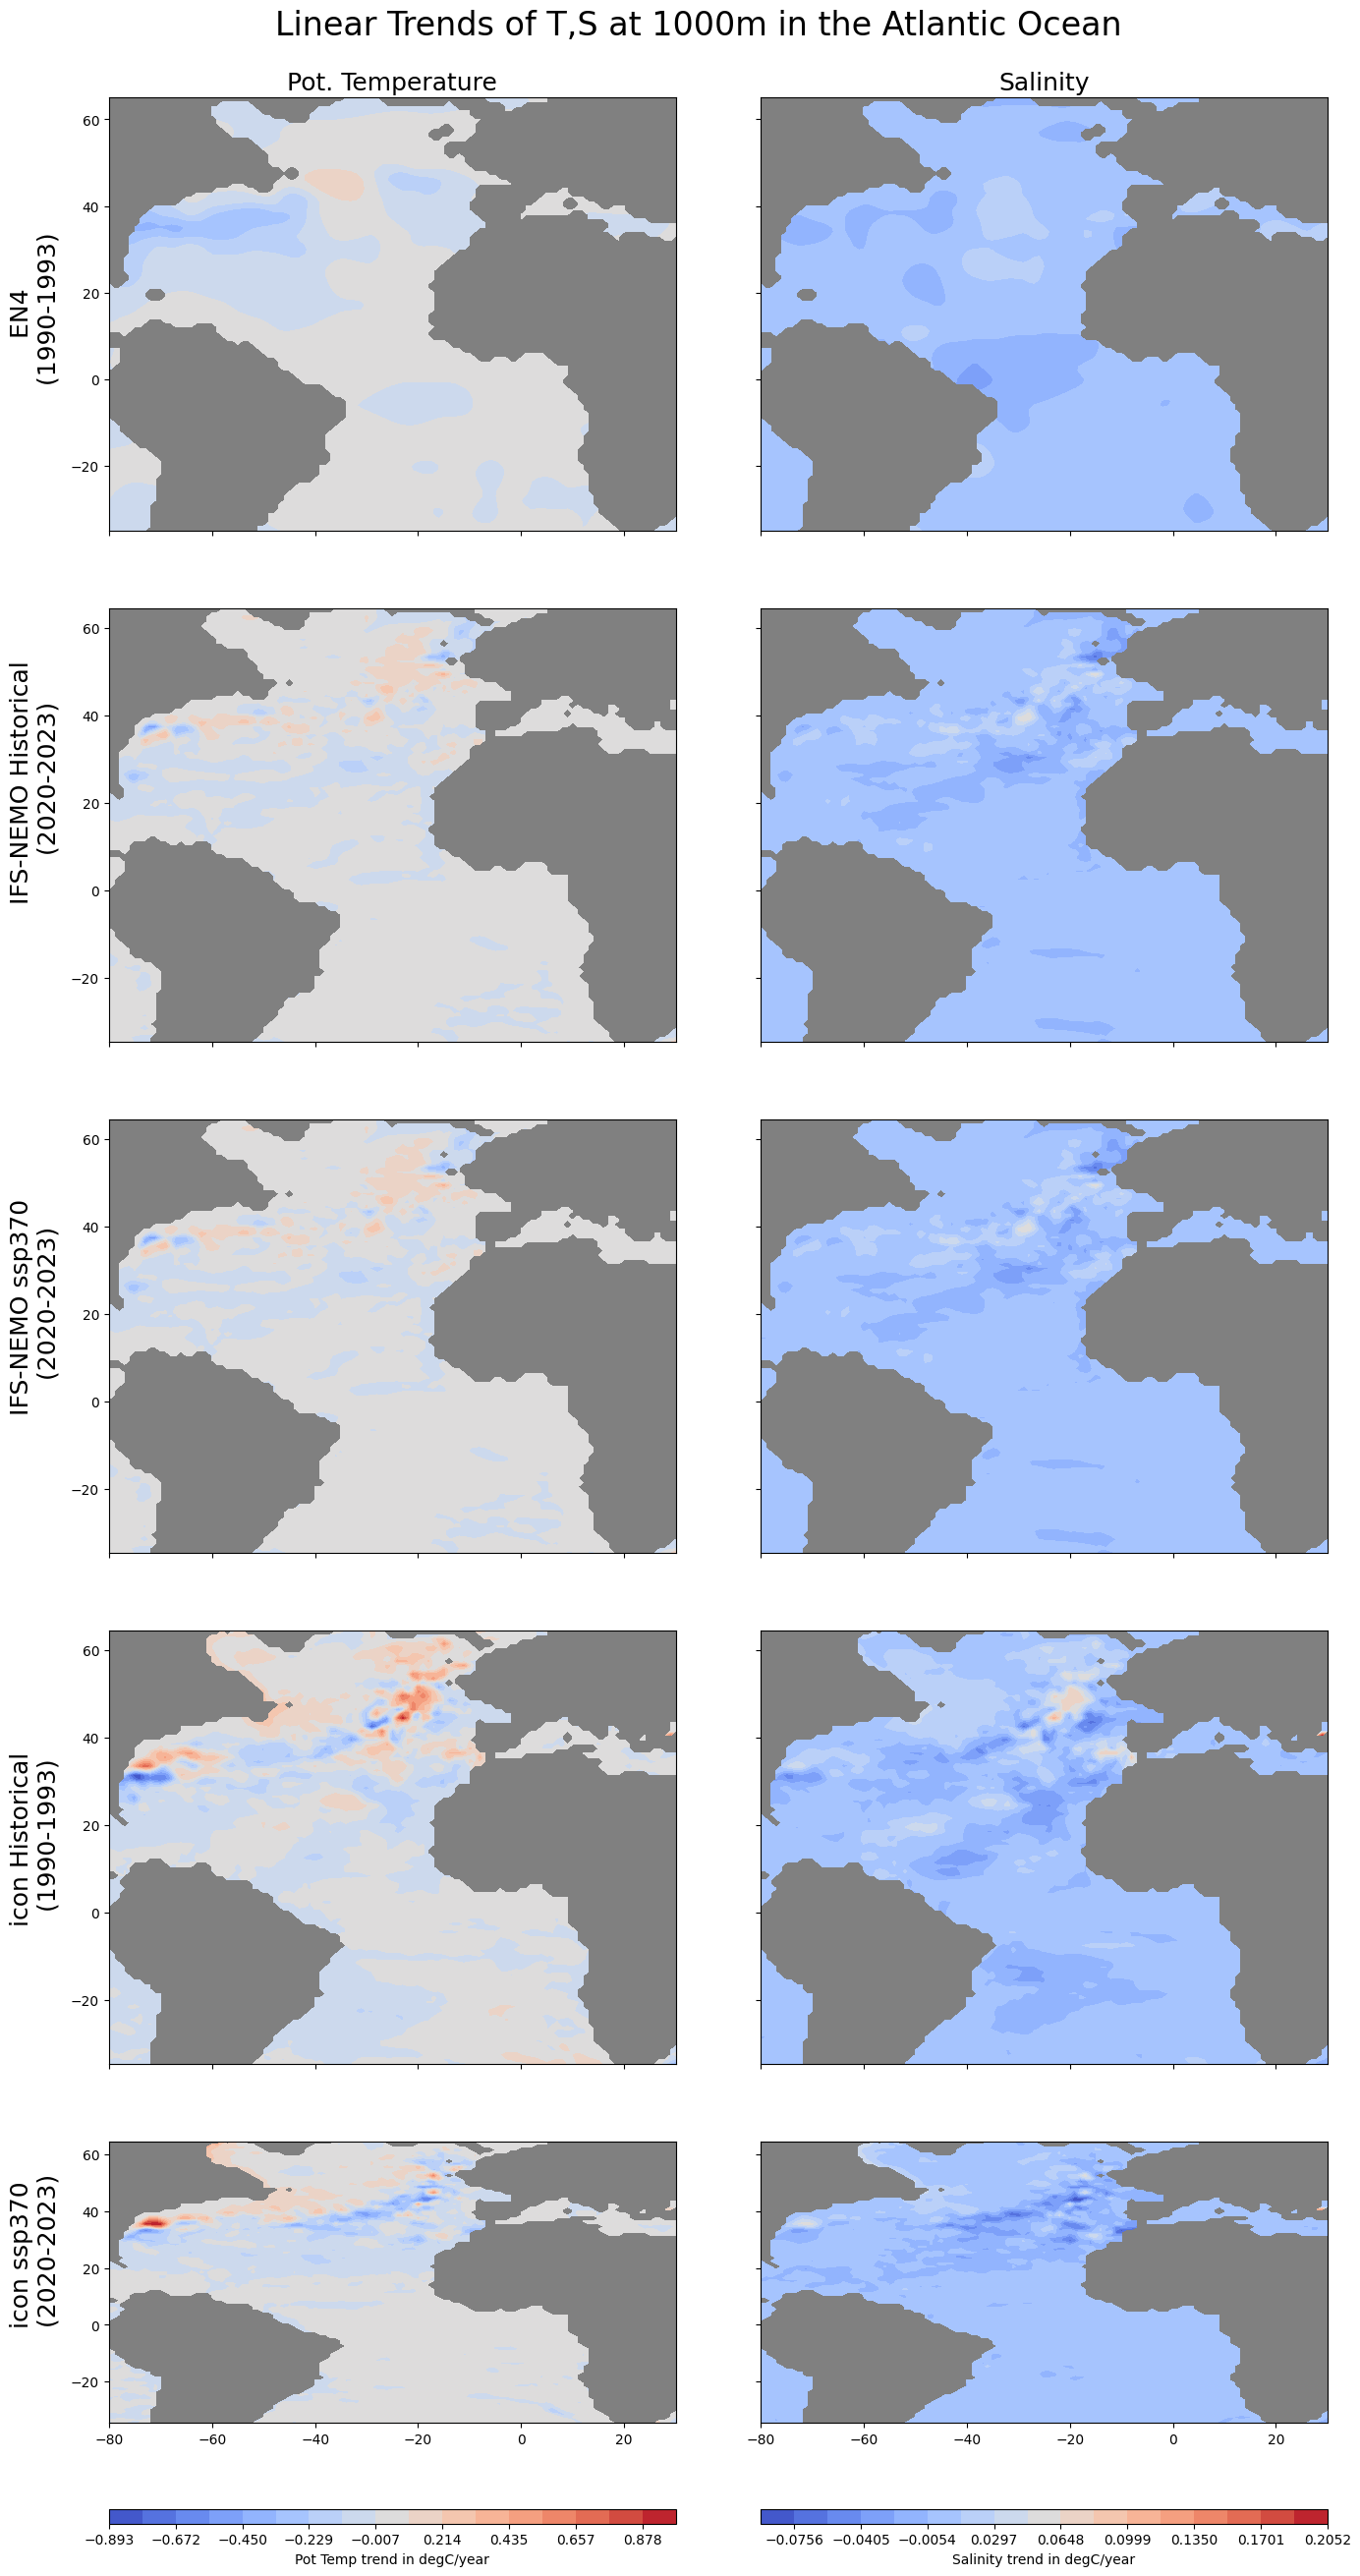

In [13]:
o3d_request["level"]=1000
o3d_request["region"]="Atlantic Ocean"
data_dict = {'EN4':en4_1,
             'IFS-NEMO Historical':ifs_nemo_ssp370,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon Historical':icon_historical,
             'icon ssp370':icon_ssp370
             } 
o3d_request["data_dict"] = data_dict 

surface_trend_plot = surface_trend(o3d_request)
surface_trend_plot.plot()

##### Trend at 10m

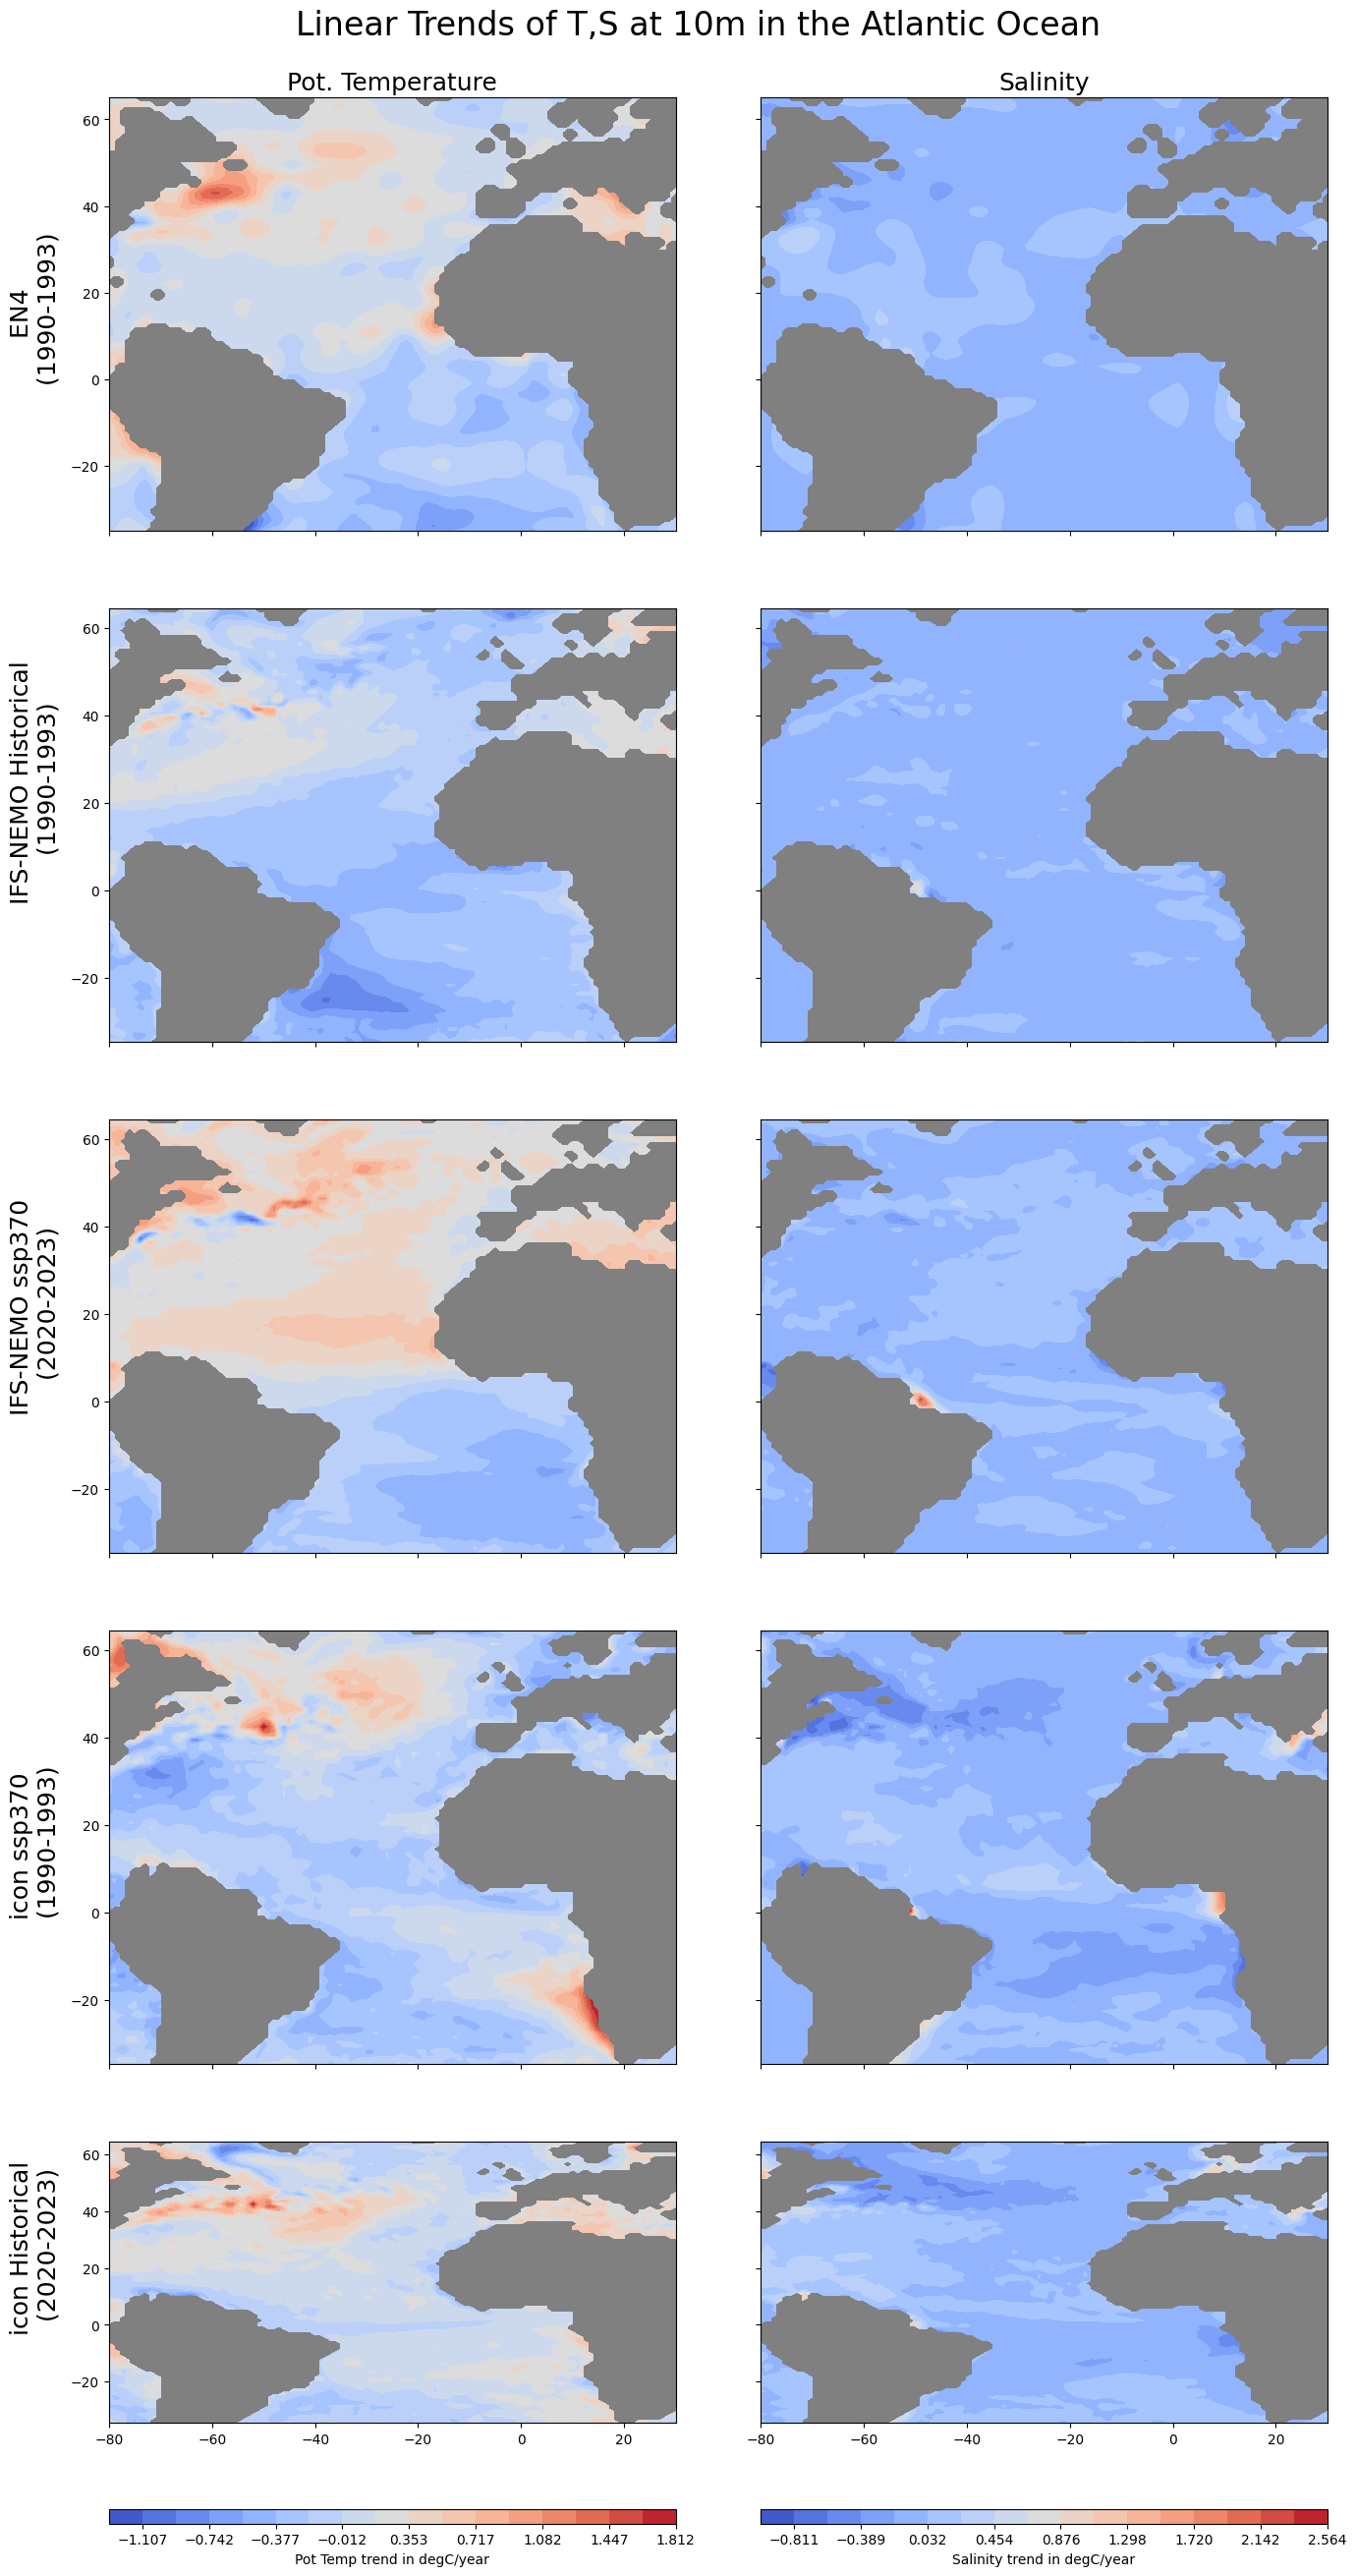

In [8]:
o3d_request["level"]=10
o3d_request["region"]="Atlantic Ocean"

data_dict = {'EN4':en4_1,
             'IFS-NEMO Historical':ifs_nemo_historical,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon ssp370':icon_historical,
             'icon Historical':icon_ssp370,
             } 
o3d_request["data_dict"] = data_dict

surface_trend_plot = surface_trend(o3d_request)
surface_trend_plot.plot()

In [2]:
from IPython import get_ipython
from IPython.lib.deepreload import reload

%load_ext autoreload
%autoreload 2

from ocean3d.ocean_circulation.multi_model.startification import *

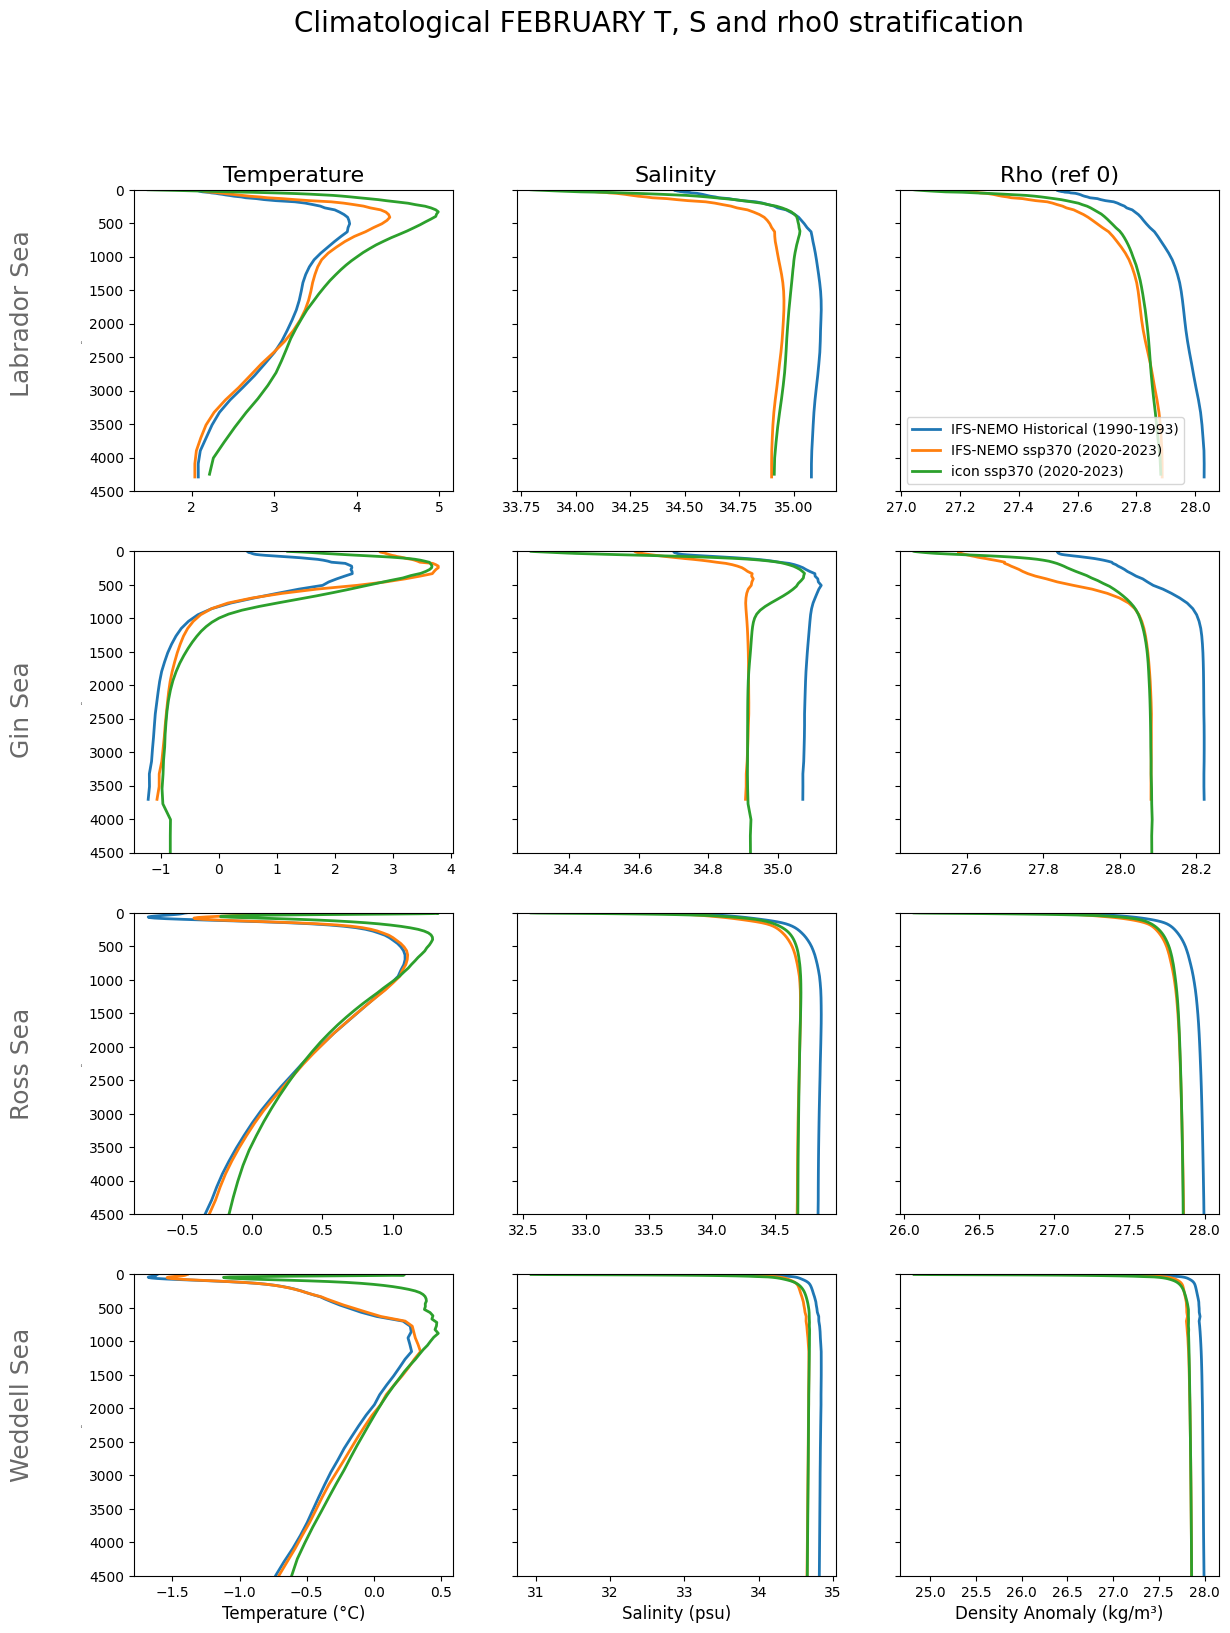

In [11]:
data_dict = {
    # 'EN4': ifs_nemo_historical,
             'IFS-NEMO Historical':ifs_nemo_historical,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon ssp370': icon_ssp370,
            #  'icon Historical':icon,
             } 

region_list = ['Labrador Sea',
               'Gin Sea',
               'Ross Sea',
               'Weddell Sea'
               ]
o3d_request= {
'data_dict': data_dict,
'latS':None,
'latN':None,
'lonW':None,
'lonE':None,
'region': 'Gin Sea',
'region_list': region_list,
'output':True,
"time" : "February",
'output_dir':'./output'}


strat = stratification(o3d_request)
strat.plot()

AttributeError: 'int' object has no attribute 'region_list'